In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [55]:
def getDf(element):
    files = {}
    for size in range(1, 5):
        with open("resultRustImmutable{}_{}.txt".format(element, size), "r") as f:
            files["size{}".format(size)] = [s.strip().split("#") for s in f.readlines()]
        
    dfs = {}
    for k in files.keys():
        df = pd.DataFrame(files[k])
        new_header = df.iloc[0]
        df = df[1:]
        df.columns = new_header
        for col in ["size", 'inittime', 'addtime', 'totaltime']:
            df[col] = df[col].map(lambda x: int(x))
        dfs[k] = df
    df = dfs['size1']
    for s in range(2, 5):
        df = pd.concat([df, dfs["size{}".format(s)]])
    return df

In [56]:
df_base = pd.DataFrame(columns=["datastructure", "size", "inittime", "addtime", "totaltime", "element"])
for data_structure in ["RustAlloc"]:
    for element in ["integer", "charArr", "string", "object"]:
        df = getDf(element)
        if data_structure == "JavaAlloc":
            df["datastructure"] = "JavaArrayList"
        elif data_structure == "RustAlloc":
            df["datastructure"] = "RustVector"
        if element == "":
            df["element"] = "Integer"
        else:
            df["element"] = element
        df_base = pd.concat([df_base, df])

In [57]:
def setSize(df):
    df.loc[df['size'] == 1, 'size'] = 10
    df.loc[df['size'] == 2, 'size'] = 100
    df.loc[df['size'] == 3, 'size'] = 1000
    df.loc[df['size'] == 4, 'size'] = 10000

In [58]:
setSize(df_base)

In [59]:
df_base

,datastructure,size,inittime,addtime,totaltime,element
1,RustVector,10,745,87,2487,integer
2,RustVector,10,1425,87,3262,integer
3,RustVector,10,1320,88,3013,integer
4,RustVector,10,1218,89,2897,integer
5,RustVector,10,1165,89,3255,integer
...,...,...,...,...,...,...
1,RustVector,10000,2006,173,179006,object
2,RustVector,10000,1502,172,184399,object
3,RustVector,10000,1431,182,200032,object
4,RustVector,10000,1244,285,173914,object


In [60]:
df_base = df_base.astype({ "size": "int32", "inittime": "int32", \
                "addtime": "int32", "totaltime": "int32"})

In [61]:
withInit_immutable = df_base[df_base["datastructure"] == "RustVector"].groupby(['element', 'size']).mean().reset_index()

In [62]:
withInit_immutable

,element,size,inittime,addtime,totaltime
0,charArr,10,1344.8,127.8,4778.0
1,charArr,100,2198.8,180.8,5122.2
2,charArr,1000,1518.2,146.0,3795.6
3,charArr,10000,1483.0,137.8,3835.4
4,integer,10,1174.6,88.0,2982.8
5,integer,100,1291.8,100.0,3168.2
6,integer,1000,2043.4,99.2,5131.2
7,integer,10000,1308.6,128.8,3642.8
8,object,10,1334.6,167.4,202969.4
9,object,100,1274.4,150.6,177303.4


In [63]:
def getDf(data_structure):
    files = {}
    for size in range(1, 5):
        with open("result{}_{}.txt".format(data_structure, size), "r") as f:
            files["size{}".format(size)] = [s.strip().split("#") for s in f.readlines()]
        
    dfs = {}
    for k in files.keys():
        df = pd.DataFrame(files[k])
        new_header = df.iloc[0]
        df = df[1:]
        df.columns = new_header
        for col in ["size", 'inittime', 'addtime', 'totaltime']:
            df[col] = df[col].map(lambda x: int(x))
        df['initialization'] = df['initialization'].map(lambda x: True if x == "true" else False)
        dfs[k] = df
    df = dfs['size1']
    for s in range(2, 5):
        df = pd.concat([df, dfs["size{}".format(s)]])
    return df

In [64]:
df_base = pd.DataFrame(columns=["datastructure", "initialization", "size", "inittime", "addtime", "totaltime", "element"])
for data_structure in ["JavaAlloc", "RustAlloc"]:
    for element in ["", "CharArr", "String", "Object"]:
        df = getDf("{}{}".format(data_structure, element))
        if data_structure == "JavaAlloc":
            df["datastructure"] = "JavaArrayList"
        elif data_structure == "RustAlloc":
            df["datastructure"] = "RustVector"
        if element == "":
            df["element"] = "Integer"
        else:
            df["element"] = element           
        df_base = pd.concat([df_base, df])

In [65]:
df_base = df_base.astype({"initialization": "bool", "size": "int32", "inittime": "int32", \
                "addtime": "int32", "totaltime": "int32"})

In [66]:
df_rustVector = df_base[df_base["datastructure"] == "RustVector"]
withoutInit_rust = df_rustVector[df_rustVector["initialization"] != True].groupby(['element', 'size']).mean().reset_index()
withInit_rust = df_rustVector[df_rustVector["initialization"] == True].groupby(['element', 'size']).mean().reset_index()

In [68]:
withInit_immutable

,element,size,inittime,addtime,totaltime
0,charArr,10,1344.8,127.8,4778.0
1,charArr,100,2198.8,180.8,5122.2
2,charArr,1000,1518.2,146.0,3795.6
3,charArr,10000,1483.0,137.8,3835.4
4,integer,10,1174.6,88.0,2982.8
5,integer,100,1291.8,100.0,3168.2
6,integer,1000,2043.4,99.2,5131.2
7,integer,10000,1308.6,128.8,3642.8
8,object,10,1334.6,167.4,202969.4
9,object,100,1274.4,150.6,177303.4


In [69]:
withInit_rust

,element,size,initialization,inittime,addtime,totaltime
0,CharArr,10,True,1264.8,2515.2,13940.8
1,CharArr,100,True,3803.4,17684.4,39851.0
2,CharArr,1000,True,3915.6,190811.8,320487.2
3,CharArr,10000,True,5799.6,1923282.6,3191423.4
4,Integer,10,True,1165.6,1780.8,3384.8
5,Integer,100,True,1402.2,11162.0,12980.0
6,Integer,1000,True,3730.2,87022.4,91219.0
7,Integer,10000,True,3881.2,889196.4,893558.8
8,Object,10,True,1487.6,2620.0,190719.4
9,Object,100,True,4776.0,10783.0,198823.4


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


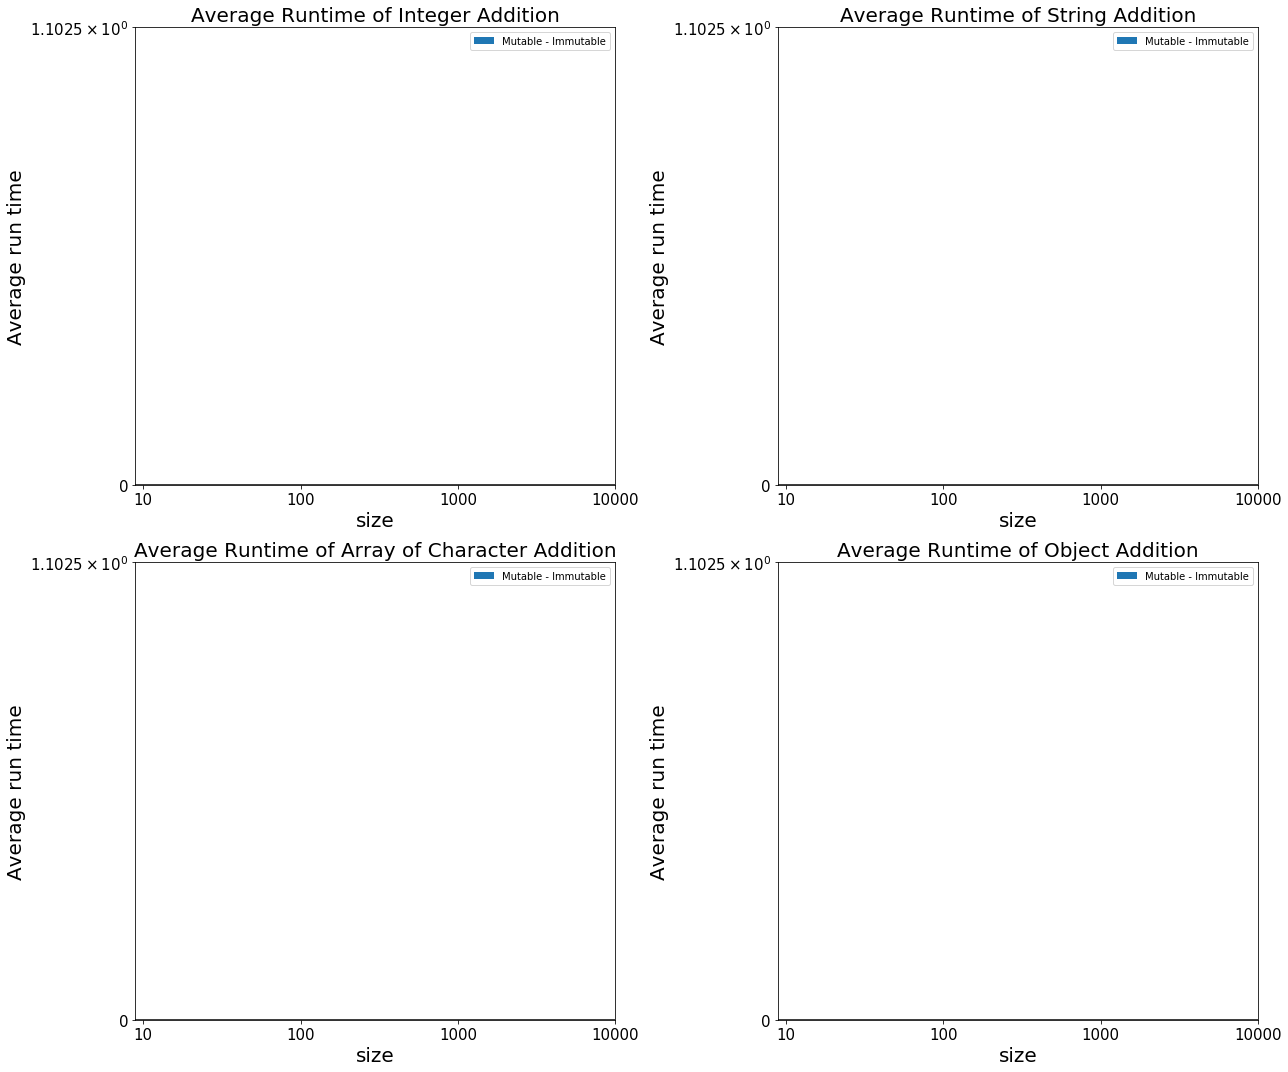

In [70]:
# Barplot taking difference.
width = 0.35 
fig, axs = plt.subplots(figsize = (18, 15), nrows=2, ncols=2)
idx = 0
element = ['Integer', 'String', 'CharArr', 'Object']
for row in range(0,2):
    for col in range(0,2):
        average_withInit = withInit_rust[withInit_rust['element'] == element[idx]].addtime
        average_withoutInit_immutable = withInit_immutable[withInit_immutable['element'] == element[idx]].addtime
        labels = np.array([10, 100, 1000, 10000])
        x = np.arange(len(labels))
        rects1 = axs[row, col].bar(x, np.round((average_withoutInit_immutable - average_withInit), 1), width, label='Mutable - Immutable')

        if element[idx] == "CharArr":
            axs[row, col].set_title("Average Runtime of {} Addition".format('Array of Character'), fontsize = 20)
        else :
            axs[row, col].set_title("Average Runtime of {} Addition".format(element[idx]), fontsize = 20)
        axs[row, col].set_xlabel("size", fontsize=20)
        axs[row, col].set_ylabel("Average run time", fontsize=20)
        axs[row, col].set_xticks(x)
        axs[row, col].set_xticklabels(labels, fontsize=15)
        axs[row, col].yaxis.set_tick_params(labelsize=15)
        axs[row, col].set_yscale('symlog')
        axs[row, col].axhline(color = 'black')
        axs[row, col].legend()
        def autolabel(rects):
            """Attach a text label above each bar in *rects*, displaying its height."""
            for rect in rects:
                height = rect.get_height()
                axs[row, col].annotate('{}'.format(height),
                            xy=(rect.get_x() + rect.get_width() / 2, height),
                            xytext=(0, 3),  # 3 points vertical offset
                            textcoords="offset points",
                            ha='center', va='bottom', fontsize = 12)
        autolabel(rects1)
        idx += 1
fig.tight_layout()
fig.savefig("rust_arraylist_difference_immutablity.eps")
plt.show()